<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS455_week2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment – Week 2, Day 5**

**Q1. Build a Basic Autoencoder**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3479 - val_loss: 0.1604
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1518 - val_loss: 0.1262
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1224 - val_loss: 0.1086
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1067 - val_loss: 0.0978
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0968 - val_loss: 0.0906
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0903 - val_loss: 0.0854
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0854 - val_loss: 0.0818
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0819 - val_loss: 0.0794
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0797 - val_loss: 0.0779
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0781 - val_loss: 0.0766
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


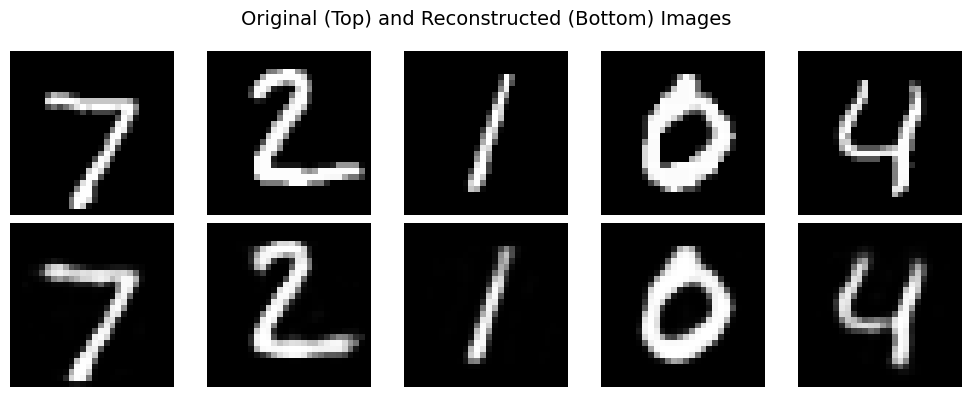

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Load and preprocess MNIST dataset
(x_train, _), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Build autoencoder
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode images
decoded_imgs = autoencoder.predict(x_test)

# Display 5 original and reconstructed images
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Original (Top) and Reconstructed (Bottom) Images", fontsize=14)
plt.tight_layout()
plt.show()


**Q2. Visualize Encoded Representations**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


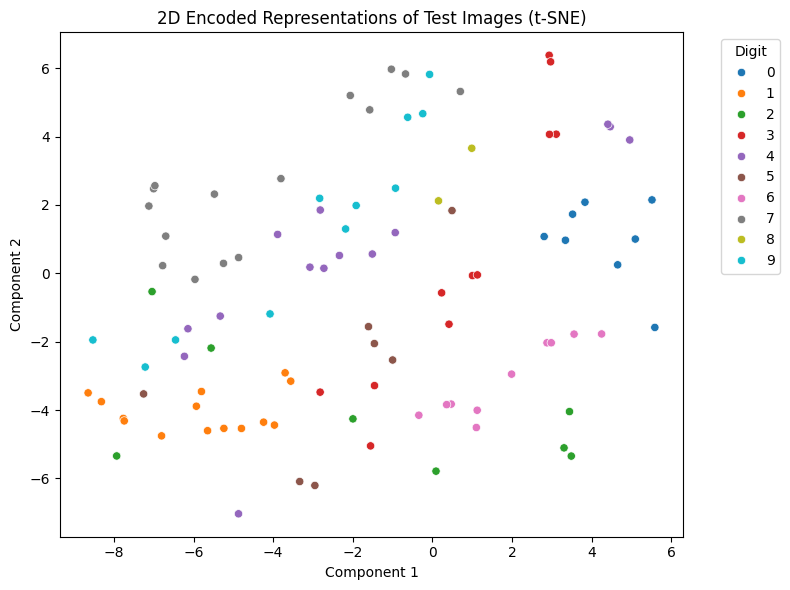

In [2]:
# Extract encoder model
encoder = Model(input_img, encoded)

# Get compressed features for 100 test images
encoded_imgs = encoder.predict(x_test[:100])

# Use PCA or t-SNE
# pca = PCA(n_components=2)
# encoded_2d = pca.fit_transform(encoded_imgs)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
encoded_2d = tsne.fit_transform(encoded_imgs)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=encoded_2d[:, 0], y=encoded_2d[:, 1], hue=y_test[:100], palette='tab10')
plt.title("2D Encoded Representations of Test Images (t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Q3. Build a Denoising Autoencoder**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3381 - val_loss: 0.1925
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1836 - val_loss: 0.1582
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1544 - val_loss: 0.1417
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1406 - val_loss: 0.1326
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1322 - val_loss: 0.1271
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1270 - val_loss: 0.1232
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1231 - val_loss: 0.1209
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1207 - val_loss: 0.1188
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1187 - val_loss: 0.1174
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1176 - val_loss: 0.1167


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


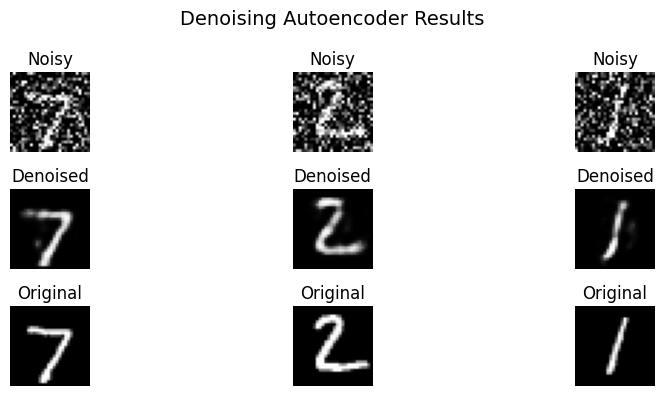

In [3]:
# Add random noise to images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build the denoising autoencoder (same architecture)
input_noisy = Input(shape=(784,))
encoded_d = Dense(64, activation='relu')(input_noisy)
decoded_d = Dense(784, activation='sigmoid')(encoded_d)
denoising_autoencoder = Model(input_noisy, decoded_d)

# Compile and train
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Predict
decoded_denoised = denoising_autoencoder.predict(x_test_noisy)

# Display 3 samples: Noisy → Denoised → Original
n = 3
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title("Noisy")
    ax.axis('off')

    # Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_denoised[i].reshape(28, 28), cmap='gray')
    ax.set_title("Denoised")
    ax.axis('off')

    # Original target
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.axis('off')

plt.suptitle("Denoising Autoencoder Results", fontsize=14)
plt.tight_layout()
plt.show()
